In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print("Example stopwords:", list(stop_words))

Example stopwords: ['does', 'were', 've', 'off', 'an', "it'll", "i'd", 'such', 'a', 'between', 'during', 'me', "he'll", 'mustn', 'then', 'both', 'same', "don't", "shouldn't", 'or', "you'll", 'again', "he's", 'each', 'other', 'can', 'needn', 'weren', 'having', 'nor', 'itself', 'did', 'will', 'herself', 'now', 'where', 'had', 'your', 'yourselves', 'y', 'hasn', "i'm", 'not', 'to', "shan't", 'doing', 't', 'only', "wouldn't", 'below', 'him', 'being', 'so', 'its', 'was', 'isn', 'what', 'himself', 'shan', 'but', 'll', 'won', "you've", 'from', 'some', 'i', "hasn't", 'ma', 'if', 'mightn', 'out', 'over', "they've", 'the', 'just', 'whom', 'yours', 'aren', 'my', 'yourself', 'when', 'it', "aren't", "needn't", 'haven', 'into', 'them', 'after', 'few', 'these', 'who', 'do', 'theirs', "won't", "we'll", 'they', 'm', 'more', 'o', 'ours', 'our', 'as', 'she', "wasn't", "isn't", 'should', "couldn't", "hadn't", 'most', 'don', 're', "it'd", "she'd", 'hadn', "should've", 'under', 'themselves', "mightn't", "did

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('C:/Users/iT/Desktop/sent/IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Data Cleaning

In [4]:
data.describe()


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

C:\Users\iT\AppData\Local\Temp\ipykernel_10012\2387300054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['sentiment'], palette=['red', 'blue'])


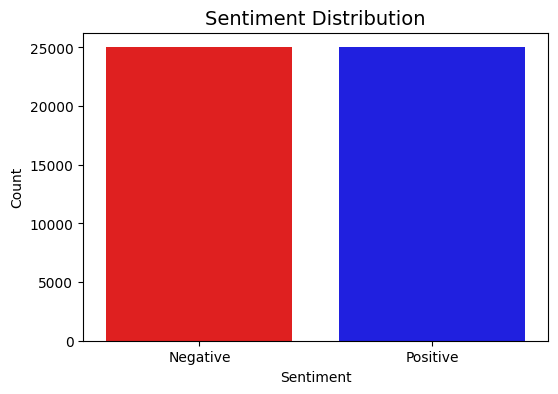

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['sentiment'], palette=['red', 'blue'])
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [14]:
print("Count Duplicates:" , data.duplicated().sum())

Count Duplicates: 418


In [40]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data

,review,sentiment,processed_text
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,0,going disagree previous comment side maltin on...


Preprocessing

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re

def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [15]:
data['processed_text'] = data['review'].apply(preprocess_text)
data['processed_text']

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: processed_text, Length: 49582, dtype: object

Generate WordCloud for Visualization

In [42]:
from wordcloud import WordCloud

text_data = ' '.join(data['processed_text'])

Creates a word cloud from negative reviews.

Visualizes frequently occurring words in negative reviews.

Plots the word cloud for easy interpretation

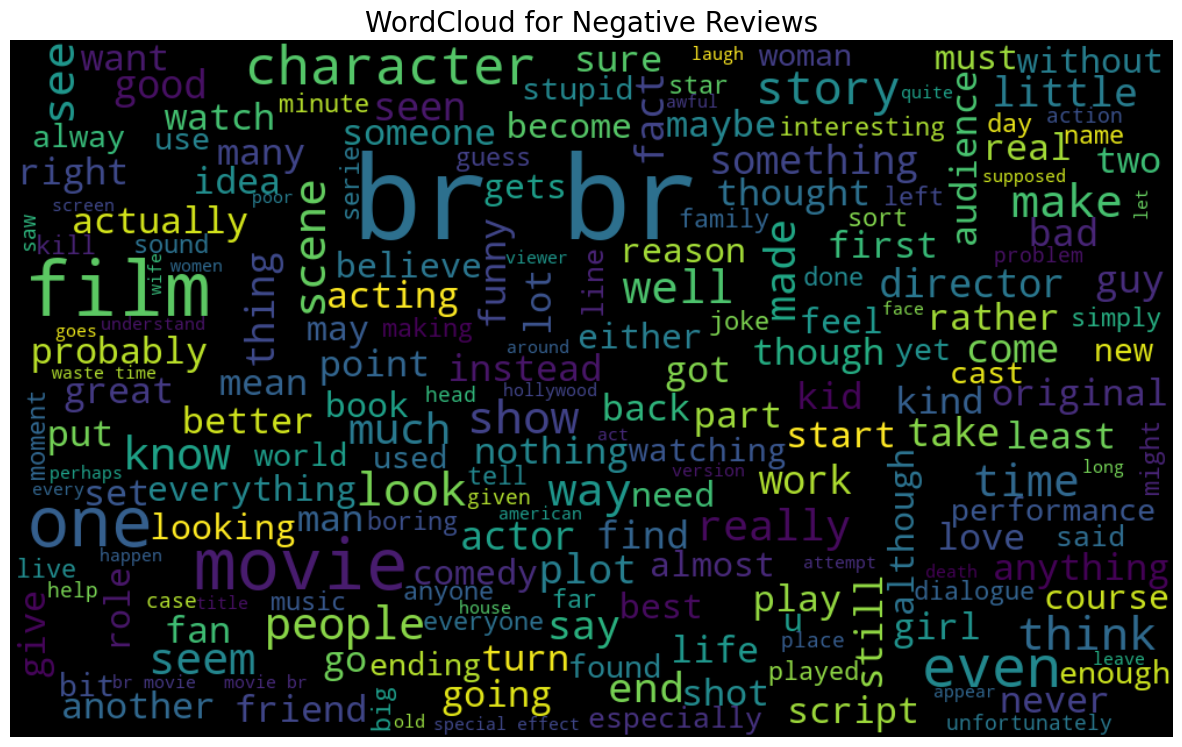

In [18]:
reviews = ' '.join(data['processed_text'][data['sentiment'] == 'negative'])
wordcloud_neg = WordCloud(width=1000, height=600, max_font_size=100, background_color='black').generate(reviews)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Negative Reviews", fontsize=20)
plt.show()

Creates a word cloud from positive reviews.

Visualizes frequently occurring words in positive reviews.

Plots the word cloud for easy interpretation

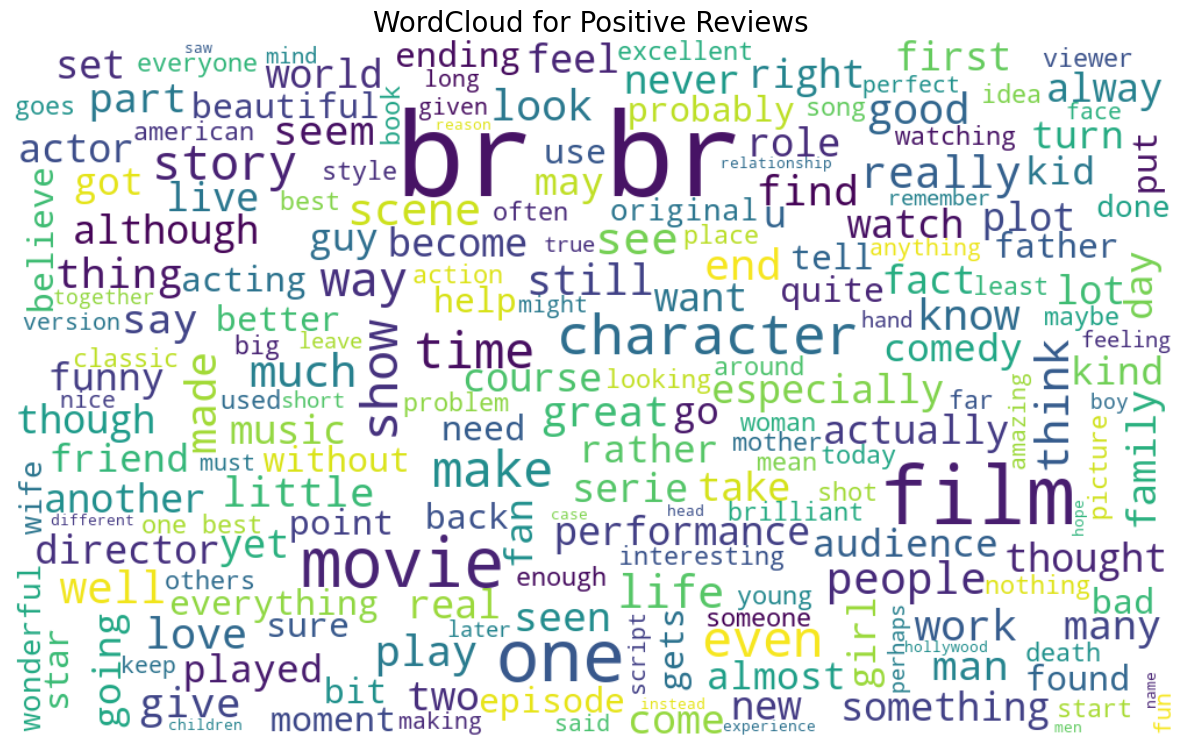

In [19]:
reviews = ' '.join(data['processed_text'][data['sentiment'] == 'positive'])
wordcloud_pos = WordCloud(width=1000, height=600, max_font_size=100, background_color='white').generate(reviews)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Positive Reviews", fontsize=20)
plt.show()

Convert Text to Numeric Features using TF-IDF

In [20]:
cv = TfidfVectorizer(max_features=2500)
reviews = cv.fit_transform(data['processed_text']).toarray()

#encoding
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0]) 

C:\Users\iT\AppData\Local\Temp\ipykernel_26080\2509898296.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])


In [21]:
data['sentiment'].value_counts()

sentiment
1    24884
0    24698
Name: count, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [46]:
#Trains a Logistic Regression model on the processed text data
model.fit(reviews_train,sent_train)  

LogisticRegression()

In [47]:
#Make Predictions & Evaluation
predict = model.predict(reviews_test)

Model Accuracy

In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(sent_test, predict) 
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 88.01%


Confusion matrix to measure model performance.

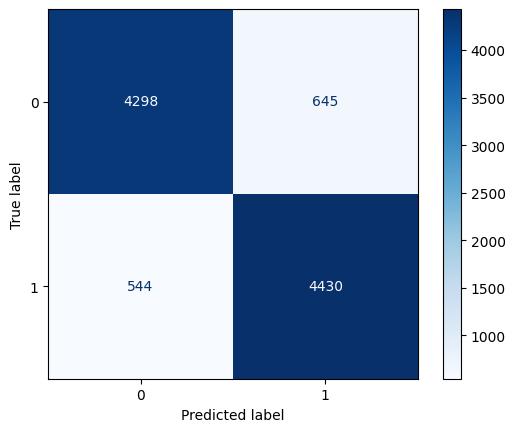

In [57]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot(cmap='Blues')
plt.show()

Save the Model using Pickle

In [58]:
import pickle as pk

In [59]:
pk.dump(model,open('model.pkl','wb'))

In [60]:
pk.dump(cv,open('scaler.pkl','wb'))